<a href="https://colab.research.google.com/github/JamesPeralta/NeuroNexus2019/blob/master/ModelTraining/NeuroNexus_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount drive and download libraries from Github

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!curl "https://raw.githubusercontent.com/JamesPeralta/NeuroNexus2019/master/Custom-Libraries/Common.py" >> Common.py
!curl "https://raw.githubusercontent.com/JamesPeralta/NeuroNexus2019/master/Custom-Libraries/Preprocessing.py" >> Preprocessing.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1572  100  1572    0     0  10693      0 --:--:-- --:--:-- --:--:-- 10767
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1663  100  1663    0     0  12792      0 --:--:-- --:--:-- --:--:-- 12792


### Any imports

In [3]:
import os
from Common import show_images, retrieve_scan, show_slice
import Preprocessing as pre
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


### Retrieve slices and thier ground-truth

In [57]:
# CD into the data
t1 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/TEST/T1/JH_T1_144.png'
c1 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/TEST/C1/JH_C1_144.png'

t1_scan = pre.retrieve_slice(t1)
c1_scan = pre.retrieve_slice(c1)
t1_scan.shape

(256, 226)

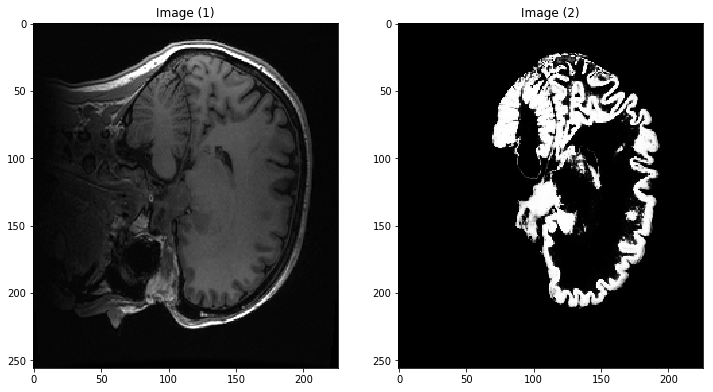

In [5]:
show_images([t1_scan, c1_scan])

### Extract patches

In [65]:
from sklearn.feature_extraction import image

# Get Input
t1_patches = image.extract_patches_2d(t1_scan, (23, 23))
x = t1_patches.reshape((47736, 23, 23, 1))
print(t1_patches.shape)

# Get labels
c1_patches = pre.patchify_slice(c1_scan, 23, 23)
y = pre.label_patches(c1_patches)
print(y.shape)

(47736, 23, 23)
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
(47736, 2)


In [0]:
show_images(t1_patches[0])

In [0]:
print(x[0])

## Creating the Neural Network

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [0]:
# Define the models architecture
def create_model():
    # Build the architecture
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', input_shape=(23, 23, 1), padding="same"))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding="same"))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.01), metrics=['acc'])
  
    return model

In [44]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 23, 23, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                204864    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
Total para

In [0]:
model.fit(x, y, batch_size=64, epochs=10)

## Predict Batch and re-construct the image

In [0]:
this = np.array(model.predict_classes(x))

In [47]:
this.shape

(47736,)

In [0]:
for i in this:
  if i == 1:
    print("Chill")

In [0]:
done = np.reshape(this, (234, 204))

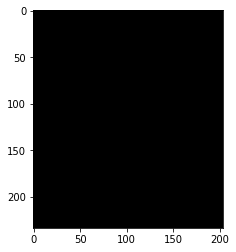

In [86]:
plt.imshow(done)